**Kelompok 7 :**
- Rafi Aziizi Muchtar
- Sandy Dwi Cahyo
- Yosua Chrisarga Manuntun Marpaung

**Load Library**

In [22]:
# Melakukan import terhadap library yang dibutuhkan pada logistic regression
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

**Read Dataset**

In [2]:
#Membaca isi dataset diabetes.csv dan menampilkan keseluruhan data baik itu isi maupun kolom
dbt = pd.read_csv('diabetes.csv')
dbt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Menampilkan deskriptif statistik data diabetes.csv dan dilakukan transformasi
dbt.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [4]:
#Mengetahui shape atau ukuran sebuah data
dbt.shape

(768, 9)

In [5]:
#Membaca kolom dengan index terakhir yaitu outcome
dbt.iloc[:,-1]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
#Membaca seluruh kolom tanpa index terakhir yaitu outcome
dbt.iloc[:,:-1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
#Menampilkan keseluruhan kolom yang tersedia pada dataset
dbt.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#Melakukan inisialisasi variable berdasarkan input data
#X merupakan keseluruhan data tanpa index terakhir yaitu kolom outcome
#Y merupakan data berisikan seluruh kolom outcome
x = dbt.iloc[:,:-1]
y = dbt.iloc[:,-1]

**Model**

In [9]:
#Inisialisasi variable lg berdasarkan fungsi LogisticRegression yang memiliki iterasi sebanyak 800 kali
lg= LogisticRegression(max_iter=800)

In [11]:
#Melakukan split data yang dibagi menjadi 4 yaitu x_train, x_test,y_train,y_test dengan test sizenya yaitu 0.35
#Data tersebut displit berdasarkan variable x dan y yang telah di inisialisasi
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35)

In [12]:
#Melakukan proses training menggunakan fungsi fit berdasarkan parameter data x_train dan y_train
logistic_regression = lg.fit(x_train,y_train)

In [13]:
#Menampilkan hasil prediksi dari logistic regression menggunakan data x_test
y_predic = logistic_regression.predict(x_test)
y_predic

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0])

In [15]:
#Memanggil data y_test yaitu outcome
y_test

169    0
628    0
107    0
11     1
25     1
      ..
368    0
176    0
41     0
45     1
729    0
Name: Outcome, Length: 269, dtype: int64

**Confusion Matrix**

In [27]:
#Load library confusion matrix pada library sklearn
#Mengaplikasikan sebuah confusion matrix pada data y_test dan y_predict
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_predic)

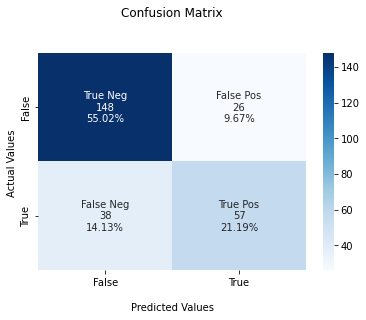

In [29]:
#Plotting data heatmap menggunakan seaborn pada hasil confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Accuracy**

In [17]:
#Menghitung akurasi dari data y_test dan y_prediksi untuk berdasarkan data test dan prediksi
accuracy_score(y_test,y_predic)

0.7620817843866171

**Precision**

In [21]:
#Menghitung nilai precision pada data test dan data prediksi
precision_score(y_test,y_predic)

0.6867469879518072

**Recall**

In [23]:
#Menghitung nilai recall pada data test dan data prediksi
recall_score(y_test,y_predic)

0.6